In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [228]:
studentID = ['SID20131151', 'SID20149500', 'SID20182516']
data = pd.read_csv("data.csv")
student = pd.read_csv("../Data/Student_Counceling_Information.csv")
resultDF = pd.DataFrame(columns=('Student', 'Predicted Score in next paper', 'Department'))

In [229]:
def findDepartment(sid):
    filtered_students = student[student["Student_ID"] == sid]
    return filtered_students.iloc[0]["Department_Admission"]

In [230]:
#find dept
def findDept(sid):
    pd.merge(student, data, on=sid)
    return 

In [231]:
def describeDf(sid):
    selected_data = data[data["Student_ID"] == sid]
    print(selected_data.loc[:, ['Marks', 'Effort_Hours']].describe())
    return selected_data

In [232]:
def plot(df, sid):
    plt.scatter(df["Effort_Hours"], df["Marks"])
    plt.title(f"Scatterplot of Effort Hours and Marks for student ID: {sid}")
    plt.xlabel("Effort Hours")
    plt.ylabel("Marks")
    plt.show()

In [233]:
def createRegressor(df):
    y = df['Marks'].values.reshape(-1, 1)
    X = df['Effort_Hours'].values.reshape(-1, 1)
    import sklearn.model_selection
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state=42)
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()

    # Now we need to "fit" the line to our data: we use .fit with our X_tran and y_train data. 
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
    ### EVALUATING the Model ###
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    mae = mean_absolute_error(y_test, y_pred) 
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error
    print(f"mae = {mae:.2f}")
    print(f"mse = {mse:.2f}")
    print(f"rmse = {rmse:.2f}")
    return regressor


In [234]:
def predict(regressor, hours):
    return regressor.predict([[hours]])[0,0]

            Marks  Effort_Hours
count   55.000000     55.000000
mean    72.563636      8.527273
std     17.093169      2.616575
min     40.000000      4.000000
25%     59.000000      6.000000
50%     74.000000      8.000000
75%     86.500000     11.000000
max    100.000000     14.000000


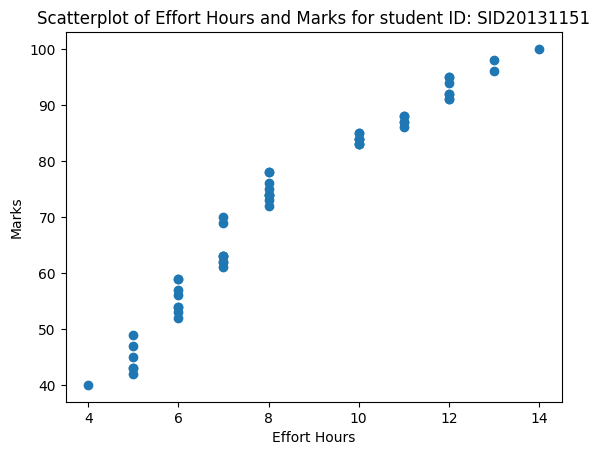

mae = 3.01
mse = 13.81
rmse = 3.72
81.99487095986322
            Marks  Effort_Hours
count   56.000000     56.000000
mean    66.428571      7.589286
std     17.202386      2.528217
min     40.000000      4.000000
25%     49.750000      5.000000
50%     65.000000      7.000000
75%     80.500000      8.500000
max    100.000000     14.000000


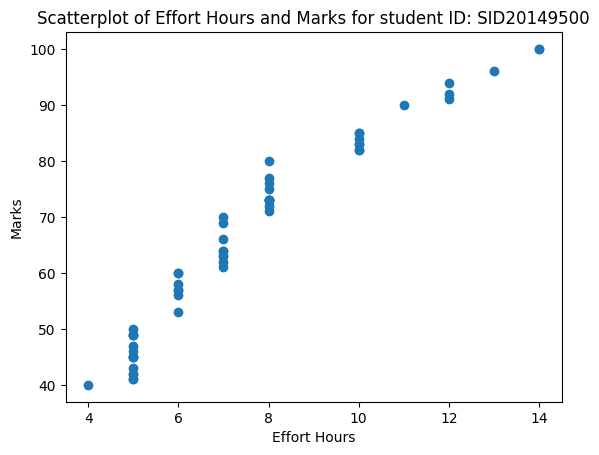

mae = 3.92
mse = 26.61
rmse = 5.16
83.13183548417044
            Marks  Effort_Hours
count   55.000000     55.000000
mean    71.763636      8.309091
std     17.340772      2.720789
min     41.000000      5.000000
25%     57.500000      6.000000
50%     74.000000      8.000000
75%     84.500000     10.000000
max    100.000000     14.000000


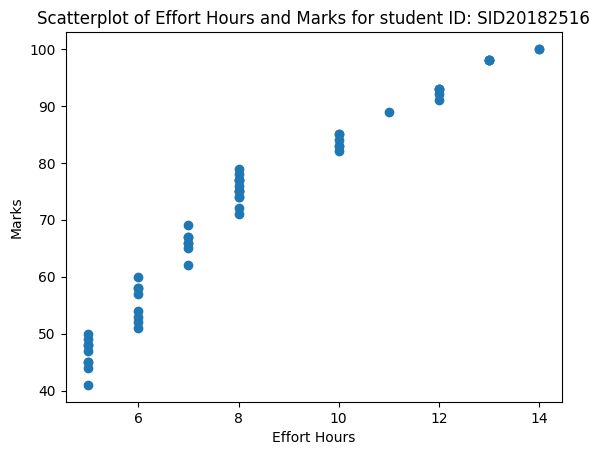

mae = 3.38
mse = 16.68
rmse = 4.08
82.40037812681791


In [235]:
for sid in studentID:
    df = describeDf(sid)
    plot(df, sid)
    regressor = createRegressor(df)
    print(predict(regressor, 10))
    department = findDepartment(sid)
    
    # Append a new row to resultDF using concat
    new_row = pd.DataFrame({'Student': [sid],
                            'Predicted Score in next paper': [predict(regressor, 10)],
                            'Department': [department]})
    resultDF = pd.concat([resultDF, new_row], ignore_index=True)

In [236]:
resultDF

,Student,Predicted Score in next paper,Department
0,SID20131151,81.994871,IDEPT6347
1,SID20149500,83.131835,IDEPT4308
2,SID20182516,82.400378,IDEPT3062
